In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from model_functions import *
from plotting_functions import *
from new_Adam import *
import no_gpu
import reproducible

In [4]:
import time

In [5]:
X_train, X_val, y_train, y_val = mnist_prep()

In [6]:
# use samller dataset for increased speed
X_train_small = X_train[:1000, :]
X_val_small = X_val[:500, :]
y_train_small = y_train[:1000]
y_val_small = y_val[:500]

n_cols = X_train_small.shape[1]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 1000 samples, validate on 500 samples
Epoch 1/5
1000/1000 [==============================] - 0s 100us/sample - loss: 2.1949 - accuracy: 0.2590 - val_loss: 1.8640 - val_accuracy: 0.4440
Epoch 2/5
1000/1000 [==============================] - 0s 38us/sample - loss: 1.4803 - accuracy: 0.5660 - val_loss: 1.2619 - val_accuracy: 0.6340
Epoch 3/5
1000/1000 [==============================] - 0s 47us/sample - loss: 0.8188 - accuracy: 0.7800 - val_loss: 0.7016 - val_accuracy: 0.8220
Epoch 4/5
1000/1000 [==============================] - 0s 69us/sample - loss: 0.3816 - accuracy: 0.9050 - val_loss: 0.5173 - val_accuracy: 0.8540
Epoch 5/5
1000/1000 [==============================] - 0s 47us/sample - loss: 0.1983 - accuracy: 0.9490 - val_loss: 0.4673 - val_accuracy: 0.8800
Overall calculation took 0.8776073455810547 seconds.
Model: "sequential"
_________________________________________________________________
La

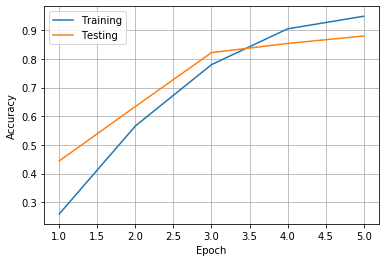

In [7]:
model = nn_model_structure(layers = 5,
                           neurons = [128, 128, 64, 32, 10],
                           n_cols = X_train_small.shape[1])
model = nn_model_compile(model,
                         optimizer = Adam_test())
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train_small,
                     y_train = y_train_small,
                     X_val = X_val_small,
                     y_val = y_val_small,
                     batch_size = 100,
                     epochs = 5)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_acc(model)
# nn_save(model, "../models/model_test_small.h5")

In [8]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 128) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(128, 64) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(64, 32) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(32,) dtype=float32>,
 <tf.Variable 'dense_4/kernel:0' shape=(32, 10) dtype=float32>,
 <tf.Variable 'dense_4/bias:0' shape=(10,) dtype=float32>]

In [9]:
model.history.history

{'loss': [2.1948742270469666,
  1.4802855730056763,
  0.8187628507614135,
  0.38160215616226195,
  0.19828399941325187],
 'accuracy': [0.259, 0.566, 0.78, 0.905, 0.949],
 'val_loss': [1.8639944076538086,
  1.261920166015625,
  0.7016376614570617,
  0.5172505915164948,
  0.4672876298427582],
 'val_accuracy': [0.444, 0.634, 0.822, 0.854, 0.88]}

In [10]:
model.evaluate(X_val_small, y_val_small)

[0.46728761577606204, 0.88]

In [11]:
y_true, y_pred = nn_class_pred_true(model, X_val_small, y_val_small, print_comp = True)

Prediction: 6, Actual: 6, True
Prediction: 9, Actual: 9, True
Prediction: 6, Actual: 8, False
Prediction: 5, Actual: 5, True
Prediction: 9, Actual: 9, True
Prediction: 9, Actual: 9, True
Prediction: 7, Actual: 7, True
Prediction: 9, Actual: 9, True
Prediction: 3, Actual: 3, True
Prediction: 2, Actual: 2, True
Prediction: 2, Actual: 2, True
Prediction: 7, Actual: 7, True
Prediction: 1, Actual: 1, True
Prediction: 5, Actual: 5, True
Prediction: 6, Actual: 6, True
Prediction: 9, Actual: 9, True
Prediction: 8, Actual: 8, True
Prediction: 6, Actual: 2, False
Prediction: 7, Actual: 7, True
Prediction: 4, Actual: 4, True
Prediction: 2, Actual: 2, True
Prediction: 7, Actual: 7, True
Prediction: 7, Actual: 9, False
Prediction: 9, Actual: 9, True
Prediction: 5, Actual: 5, True
Prediction: 4, Actual: 4, True
Prediction: 7, Actual: 7, True
Prediction: 1, Actual: 1, True
Prediction: 5, Actual: 5, True
Prediction: 5, Actual: 5, True
Prediction: 8, Actual: 8, True
Prediction: 9, Actual: 9, True
Predi

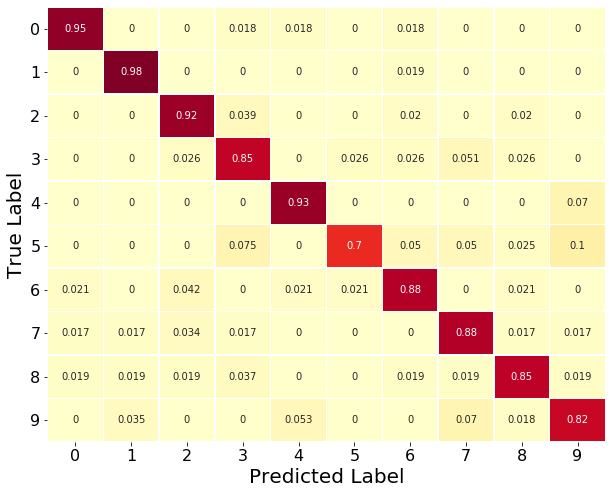

In [12]:
cm = nn_conf_mat(y_true, y_pred)

In [13]:
cm

array([[0.94642857, 0.        , 0.        , 0.01785714, 0.01785714,
        0.        , 0.01785714, 0.        , 0.        , 0.        ],
       [0.        , 0.98148148, 0.        , 0.        , 0.        ,
        0.        , 0.01851852, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.92156863, 0.03921569, 0.        ,
        0.        , 0.01960784, 0.        , 0.01960784, 0.        ],
       [0.        , 0.        , 0.02564103, 0.84615385, 0.        ,
        0.02564103, 0.02564103, 0.05128205, 0.02564103, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.93023256,
        0.        , 0.        , 0.        , 0.        , 0.06976744],
       [0.        , 0.        , 0.        , 0.075     , 0.        ,
        0.7       , 0.05      , 0.05      , 0.025     , 0.1       ],
       [0.02083333, 0.        , 0.04166667, 0.        , 0.02083333,
        0.02083333, 0.875     , 0.        , 0.02083333, 0.        ],
       [0.01724138, 0.01724138, 0.0344827